In [6]:
!pip install lightfm

In [2]:
import tensorflow as tf

# Mendapatkan daftar perangkat yang tersedia
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    print(f"GPU TensorFlow tersedia! Jumlah: {len(gpus)}")
    # Contoh mencetak nama GPU (mungkin hanya menampilkan 'GPU' di Kaggle)
    for gpu in gpus:
        print(f"Perangkat: {gpu.name}")
else:
    print("GPU TensorFlow tidak tersedia. Menggunakan CPU.")

2025-11-17 00:54:49.245444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763340889.457126      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763340889.512617      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

GPU TensorFlow tersedia! Jumlah: 1
Perangkat: /physical_device:GPU:0


In [2]:
import pandas as pd
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm.evaluation import auc_score
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset

train = pd.read_csv("/kaggle/input/data-bookss/train.csv")
test_users = pd.read_csv("/kaggle/input/data-bookss/data_target_users_test.csv")


In [8]:
# Menampilkan 5 baris pertama dari kedua dataset
print("Train Data - 5 baris pertama:")
print(train.head())

print("\nTest Users Data - 5 baris pertama:")
print(test_users.head())

Train Data - 5 baris pertama:
   user_id     item_id
0        8  0002005018
1        8  074322678X
2        8  0887841740
3        8  1552041778
4        8  1567407781

Test Users Data - 5 baris pertama:
   user_id
0        8
1       99
2      114
3      160
4      183


In [9]:
# Memeriksa missing values di dataset train
print("Missing values in 'train' dataset:")
print(train.isnull().sum())

# Memeriksa missing values di dataset test_users
print("\nMissing values in 'test_users' dataset:")
print(test_users.isnull().sum())


Missing values in 'train' dataset:
user_id    0
item_id    0
dtype: int64

Missing values in 'test_users' dataset:
user_id    0
dtype: int64


In [10]:
# Menampilkan statistik deskriptif untuk dataset train
print("Statistik deskriptif 'train' dataset:")
print(train.describe())

# Menampilkan statistik deskriptif untuk dataset test_users
print("\nStatistik deskriptif 'test_users' dataset:")
print(test_users.describe())


Statistik deskriptif 'train' dataset:
             user_id
count  269764.000000
mean   134442.794105
std     80545.073149
min         8.000000
25%     65663.000000
50%    131238.000000
75%    204663.000000
max    278854.000000

Statistik deskriptif 'test_users' dataset:
             user_id
count   13876.000000
mean   138643.753315
std     80605.374949
min         8.000000
25%     68413.250000
50%    137675.000000
75%    208743.500000
max    278854.000000


In [7]:
dataset = Dataset()
dataset.fit(
    users=train['user_id'].unique(),
    items=train['item_id'].unique()
)


In [8]:
(interactions, weights) = dataset.build_interactions(
    (row['user_id'], row['item_id']) for idx, row in train.iterrows()
)


In [9]:
model_baseline = LightFM(loss='warp')
model_baseline.fit(interactions, epochs=10, num_threads=4)


In [10]:
model_before = LightFM(loss='logistic', learning_rate=0.05)
model_before.fit(interactions, epochs=15, num_threads=4)


In [11]:
model_after = LightFM(
    loss='warp',
    no_components=64,       # latent factor
    learning_rate=0.03,
    item_alpha=1e-6,
    user_alpha=1e-6
)

model_after.fit(interactions, epochs=25, num_threads=4)


In [12]:
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score


In [13]:
print("Baseline AUC:", auc_score(model_baseline, interactions).mean())
print("Baseline P@10:", precision_at_k(model_baseline, interactions, k=10).mean())
print("Baseline R@10:", recall_at_k(model_baseline, interactions, k=10).mean())


Baseline AUC: 0.9028751
Baseline P@10: 0.029208707
Baseline R@10: 0.020284554825236896


In [14]:
print("Before Tuning AUC:", auc_score(model_before, interactions).mean())
print("Before Tuning P@10:", precision_at_k(model_before, interactions, k=10).mean())
print("Before Tuning R@10:", recall_at_k(model_before, interactions, k=10).mean())


Before Tuning AUC: 0.8522377
Before Tuning P@10: 0.017180743
Before Tuning R@10: 0.012129191021734516


In [15]:
print("After Tuning AUC:", auc_score(model_after, interactions).mean())
print("After Tuning P@10:", precision_at_k(model_after, interactions, k=10).mean())
print("After Tuning R@10:", recall_at_k(model_after, interactions, k=10).mean())


After Tuning AUC: 0.99571073
After Tuning P@10: 0.1840372
After Tuning R@10: 0.14536287225845027


In [17]:
# === BASELINE ===
baseline_auc = auc_score(model_baseline, interactions).mean()
baseline_p10 = precision_at_k(model_baseline, interactions, k=10).mean()
baseline_r10 = recall_at_k(model_baseline, interactions, k=10).mean()

# === BEFORE TUNING ===
before_auc = auc_score(model_before, interactions).mean()
before_p10 = precision_at_k(model_before, interactions, k=10).mean()
before_r10 = recall_at_k(model_before, interactions, k=10).mean()

# === AFTER TUNING ===
after_auc = auc_score(model_after, interactions).mean()
after_p10 = precision_at_k(model_after, interactions, k=10).mean()
after_r10 = recall_at_k(model_after, interactions, k=10).mean()


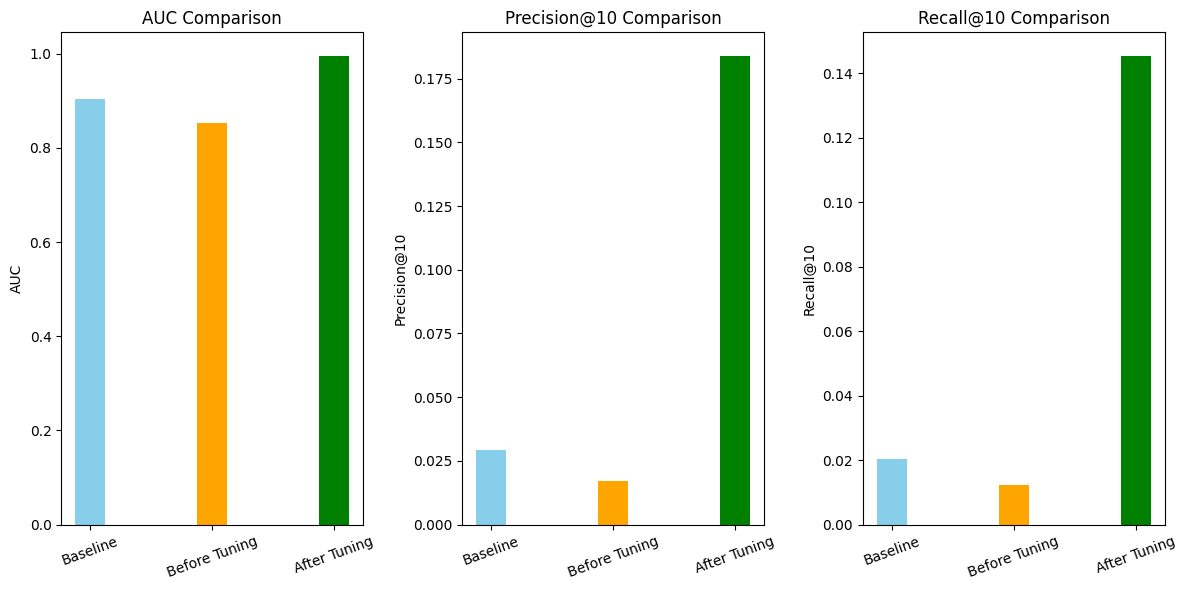

In [18]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Baseline', 'Before Tuning', 'After Tuning']

auc_values = [baseline_auc, before_auc, after_auc]
p10_values = [baseline_p10, before_p10, after_p10]
r10_values = [baseline_r10, before_r10, after_r10]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(12, 6))

# === AUC ===
plt.subplot(1, 3, 1)
plt.bar(x, auc_values, width, color=['skyblue', 'orange', 'green'])
plt.title("AUC Comparison")
plt.xticks(x, models, rotation=20)
plt.ylabel("AUC")

# === Precision@10 ===
plt.subplot(1, 3, 2)
plt.bar(x, p10_values, width, color=['skyblue', 'orange', 'green'])
plt.title("Precision@10 Comparison")
plt.xticks(x, models, rotation=20)
plt.ylabel("Precision@10")

# === Recall@10 ===
plt.subplot(1, 3, 3)
plt.bar(x, r10_values, width, color=['skyblue', 'orange', 'green'])
plt.title("Recall@10 Comparison")
plt.xticks(x, models, rotation=20)
plt.ylabel("Recall@10")

plt.tight_layout()
plt.show()


In [19]:
import numpy as np

def recommend_topN_lightfm(model, dataset, user_id, N=10):
    # encode user
    try:
        user_idx = dataset.mapping()[0][user_id]
    except:
        return []

    # get all item id & index
    item_map = dataset.mapping()[2]
    item_ids = list(item_map.keys())
    item_indices = list(item_map.values())

    # predict score
    scores = model.predict(user_ids=user_idx, item_ids=item_indices)

    # ambil Top-N
    top_items_idx = np.argsort(-scores)[:N]

    # kembalikan item ID asli
    return [item_ids[i] for i in top_items_idx]
